# IS509 Assignment 3

For the following questions, use the provided dataset (data.csv) that consists of 1000 examples with eleven input features (c1, c2, n1, n2, n3, n4, n5, n6, u1, u2, u3) and one target variable (y).   
Please apply preprocessing steps, if necessary.

## Q1) Train-Test split (25 pts)

In this part, train-test split will be applied with test sizes of 5%,10%,...., 90%, and 95%. 

- For each test size option, randomly split the original dataset into a training set and a testing set, fit a linear regression model using the train set, and calculate mean squared error (MSE) on the train set and the test set. 

- Repeat the above experiment 100 times for each test size option and find the median and the interquartile range (IQR) of MSE values for each test size option. (You may also consider other statistics that you think helpful to comment on the results)

- Plot and comment on the results. 

- Are the medians and the IQR of MSE similar for different test sizes? Why are they different (or similar)?

- Which option (or options) seems to be better for training/testing on this dataset? Explain your reasoning.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statistics import median
from scipy.stats import iqr
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv("data.csv")
data.head()
#data.isna().sum()

,c1,c2,n1,n2,n3,n4,n5,n6,u1,u2,u3,y
0,D,very_high,17.00,21.51,20.20,9.62,18.58,9.75,4.43,10.39,20.74,167.013
1,B,very_low,29.57,17.14,26.70,11.06,18.83,9.22,9.10,6.27,21.86,182.912
2,C,very_high,32.39,22.10,22.05,9.86,19.91,10.04,4.65,16.50,8.12,276.716
3,D,moderate,19.34,17.70,32.03,11.08,21.24,10.14,2.21,14.87,8.00,167.443
4,D,moderate,27.20,15.79,26.29,10.36,20.76,11.10,9.50,7.14,6.97,176.137


First, we check and see that there are no missing values for all features and the target variable. 
Next, we observe that c1 and c2 features are categorical variables, they are most probably ordinal.
For Linear Regression with categorical features, One Hot Encoding is more appropriate than Label Encoding.

unique values of c1: ['D' 'B' 'C' 'J' 'I' 'H' 'E' 'F' 'A' 'G']
unique values of c2: ['very_high' 'very_low' 'moderate' 'low' 'high']
predictor variables: Index(['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'u1', 'u2', 'u3', 'c1_A', 'c1_B',
       'c1_C', 'c1_D', 'c1_E', 'c1_F', 'c1_G', 'c1_H', 'c1_I', 'c2_high',
       'c2_low', 'c2_moderate', 'c2_very_high'],
      dtype='object')
(1000, 23)


,n1,n2,n3,n4,n5,n6,u1,u2,u3,c1_A,...,c1_E,c1_F,c1_G,c1_H,c1_I,c2_high,c2_low,c2_moderate,c2_very_high,y
0,17.00,21.51,20.20,9.62,18.58,9.75,4.43,10.39,20.74,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,167.013
1,29.57,17.14,26.70,11.06,18.83,9.22,9.10,6.27,21.86,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182.912
2,32.39,22.10,22.05,9.86,19.91,10.04,4.65,16.50,8.12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,276.716
3,19.34,17.70,32.03,11.08,21.24,10.14,2.21,14.87,8.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167.443
4,27.20,15.79,26.29,10.36,20.76,11.10,9.50,7.14,6.97,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,176.137


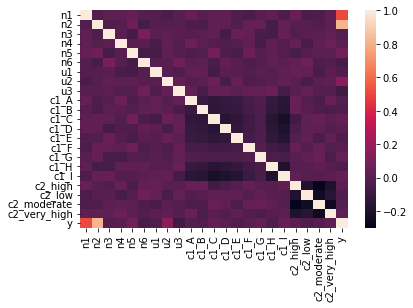

In [3]:
#OneHotEncoder implemantation
print('unique values of c1:', data.c1.unique())
print('unique values of c2:', data.c2.unique())
onehot_encoder = OneHotEncoder(drop=['J', 'very_low'])
encoded = onehot_encoder.fit_transform(data[['c1','c2']]) # From c1, we drop 'J' and from c2, drop 'very_low'
data_newpredictors = onehot_encoder.get_feature_names_out(['c1', 'c2'])
data_add = pd.DataFrame(encoded.toarray(), columns=data_newpredictors)
data_ohe = data.merge(data_add, left_index=True, right_index=True)
data_ohe2 = data_ohe.drop(columns=['c1','c2','y']) # y will be moved to be the last column
data_predictors = data_ohe2.columns
data_y = data.loc[:,'y']
data_final = data_ohe2.merge(data_y, left_index=True, right_index=True)
print('predictor variables:', data_predictors)
print(data_final.shape)
display(data_final.head())
ax = sns.heatmap(data_final.corr(), xticklabels=1, yticklabels=1)

With the heatmap of correlation, we check if there are any high correlation between any two variables.
Correlation gives us the direction and strength of the relationship between two variables.
In our data, corr(n2,y) = 0.81 and corr(n1,y) = 0.50.
These values indicate positive strong relationship between n1 and y, and also between n2 and y.
We observe that there is no medium and high correlation between any two input variables.

      train_MSE   test_MSE
0.05  46.511031  33.329748
0.10  46.174254  44.653568
0.15  45.816216  47.055040
0.20  43.747203  57.677888
0.25  37.765245  72.453435
0.30  46.697504  45.512341
0.35  40.406277  57.238938
0.40  43.690954  51.529523
0.45  39.934525  55.795987
0.50  46.308178  47.504256
0.55  48.182890  45.224371
0.60  37.412962  56.069298
0.65  33.333287  55.044379
0.70  35.422295  54.588539
0.75  45.142346  51.284005
0.80  31.963379  56.023461
0.85  45.627239  51.265152
0.90  28.036347  55.387147
0.95  33.429973  89.755033


Text(0.5, 1.0, 'MSE for Training dataset & MSE for Test dataset vs Test Size in a Single Trial')

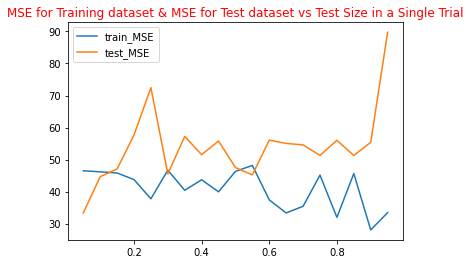

In [4]:
# Train - Test Split - One trial
MSE_vs_test_size = pd.DataFrame(columns = ['train_MSE', 'test_MSE'])

for n in range(19): 
    x_train, x_test, y_train, y_test = train_test_split(data_final.iloc[:,:22],data_final.y,test_size=((n+1)*0.05),random_state=n)
    model1 = linear_model.LinearRegression()
    model1.fit(x_train, y_train)
    MSE_vs_test_size.loc[((n+1)*0.05)] = (metrics.mean_squared_error(y_train,model1.predict(x_train)),metrics.mean_squared_error(y_test,model1.predict(x_test)))
    
print(MSE_vs_test_size)
MSE_vs_test_size.plot()
plt.title('MSE for Training dataset & MSE for Test dataset vs Test Size in a Single Trial', c='r')

      train_median_MSE  test_median_MSE
0.05         46.193211        39.686568
0.10         46.293206        42.853469
0.15         46.266138        45.063502
0.20         46.619890        44.543474
0.25         46.286211        46.155117
0.30         45.994578        47.400768
0.35         46.046541        47.043148
0.40         45.706936        47.865405
0.45         46.322918        47.776656
0.50         46.056984        48.230314
0.55         44.553216        50.186799
0.60         44.624770        50.179949
0.65         44.321253        50.661955
0.70         43.566717        51.355876
0.75         42.491667        52.415713
0.80         40.735663        53.606536
0.85         38.974092        56.302992
0.90         33.229381        61.346760
0.95         20.688129        81.276753
      train_IQR_MSE  test_IQR_MSE
0.05       1.108722     21.390353
0.10       2.268704     22.196324
0.15       3.378149     19.373242
0.20       4.072657     16.856786
0.25       4.631961     14.576

Text(0.5, 1.0, 'IQR of MSE for Training dataset and IQR of MSE for Test dataset vs Test Size in 100 random trials')

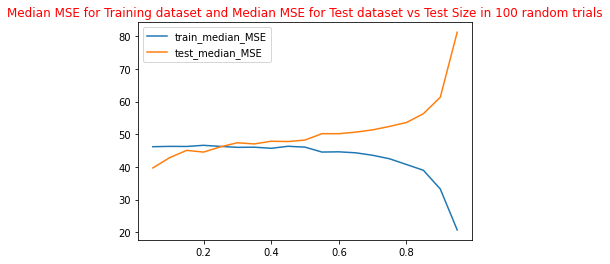

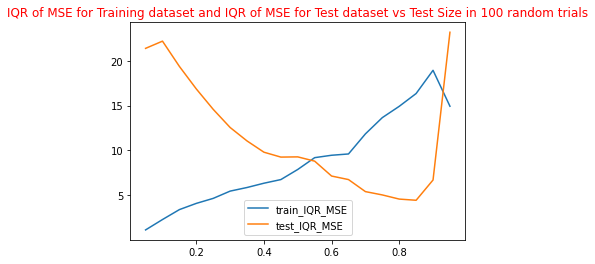

In [5]:
# Train - Test Split - Repeating the experiment 100 times randomly
median_MSE = pd.DataFrame(columns = ['train_median_MSE', 'test_median_MSE'])
IQR_MSE = pd.DataFrame(columns = ['train_IQR_MSE', 'test_IQR_MSE'])

for n in range(19): 
    train_error = []
    test_error = []
    for i in range(99):
        x_train, x_test, y_train, y_test = train_test_split(data_final.iloc[:,:22],data_final.y,test_size=((n+1)*0.05),random_state=i)
        model1 = linear_model.LinearRegression()
        model1.fit(x_train, y_train)
        train_error.append(metrics.mean_squared_error(y_train,model1.predict(x_train)))
        test_error.append(metrics.mean_squared_error(y_test,model1.predict(x_test)))
    
    median_MSE.loc[((n+1)*0.05)] = (median(train_error),median(test_error))
    IQR_MSE.loc[((n+1)*0.05)] = (iqr(train_error),iqr(test_error))

print(median_MSE)
print(IQR_MSE)

median_MSE.plot()
plt.title('Median MSE for Training dataset and Median MSE for Test dataset vs Test Size in 100 random trials', c='r')
IQR_MSE.plot()
plt.title('IQR of MSE for Training dataset and IQR of MSE for Test dataset vs Test Size in 100 random trials', c='r')

- Are the medians and the IQR of MSE similar for different test sizes? Why are they different (or similar)? 

The median and the IQR of MSE for test and training sets change with different test sizes.

The reasoning behind this situation can be explained as follows: 

The median of MSE values for training set have the largest value of approximately 46 for small test sizes and the smallest value of 20.7 for test size of 0.95. 

As test size increases we start to use a smaller training set. In a larger training set, new observations are introduced in model generation, so the model tries to represent these values as well and training error increases.
Hence, in our graph, we observe that the median of MSE values for training set decrease as test size increases.

However, for test set, we observe an increase in the median of MSE values as the test size increases. It starts with 39.7 for test size of 0.05 and reaches its highest value of 81.3 when test size is 0.95. The reason is that we use a smaller training set and the model loses its representing performance as it has less observations in training dataset. For example, when test size is 0.95, we have just 50 observations in training dataset which may not be sufficient to build a generalizable model where we test this poor model with 950 unseen observations and hence, we get a high MSE value for test dataset. 

In addition, for large test sizes, we observe overfitting in the graph that is the model starts to fit perfectly to the training dataset but it is not generalizable to test dataset. The error in test dataset is considerably higher than the error in training dataset.

In terms of IQR, since we use more observations for test data, the dispersion of MSE values decrease as test size increases. Similarly, as our training set decreases we get less number of results and the variance increases.  

- Which option (or options) seems to be better for training/testing on this dataset? Explain your reasoning.

We aim to build a model that has successful performance when it is tried with new test data.
Hence, we aim to have a small MSE for test data.
If we have a small number of observations in training dataset, we may not come up with a successful model. On the other hand, if we do not have enough number of examples in our test dataset, our performance estimate for test dataset may not be reliable. 

In our dataset, the median of test MSE starts to increase after the test size of 0.5. In [0.05 - 0.5] range, the IQR for test data is at its lowest value for test size = 0.5.
Therefore, test size of 0.5 seems to be the best option for this dataset. 

## Q2 - Sample Size (25 pts)

In this part, models will be trained by using random samples of size 50,100,150,200,250,....,900, and 950 rows taken from the original dataset. 

- For each sample size option, randomly take a sample from the given dataset, apply train-test split (%70 train-%30 test), fit a linear regression model, and evaluate MSE on the train and test sets. 

- Repeat the above experiment 100 times for each sample size option and find the median and IQR of MSE values for each sample size option. (You may also consider other statistics that you think helpful to comment on the results)

- Plot and comment on the results.

- Are the performances on the train and test sets similar for different sample sizes? If not, why are the performances on the train set better/worse than the performance on the test set? You can answer these questions for small and large sample sizes separately. 

- If there were more examples in the dataset, would the performance improve? 

- Could regularization improve the performance on the test set for small samples and/or large samples? Briefly explain your reasoning.      

     train_median_MSE  test_median_MSE
50          13.728301        96.207849
100         24.441379        60.433197
150         30.364411        49.570708
200         33.425084        47.136357
250         35.832753        47.198513
300         38.233159        46.200242
350         41.341650        44.938741
400         41.584685        46.751438
450         42.292650        45.663033
500         42.406480        46.251021
550         42.921601        46.740839
600         42.267010        49.314320
650         44.183012        47.982559
700         43.673120        46.624311
750         44.669722        48.414355
800         45.623188        47.558438
850         45.120517        47.735107
900         45.150531        48.896577
950         45.918835        46.911030
     train_IQR_MSE  test_IQR_MSE
50       10.241386    102.251926
100      14.964484     44.747663
150      15.228464     30.523062
200      11.333902     31.792702
250      14.362019     27.176672
300      17.056675    

Text(0.5, 1.0, 'IQR of MSE for Training dataset and IQR of MSE for Test dataset vs Sample Size in 100 random trials')

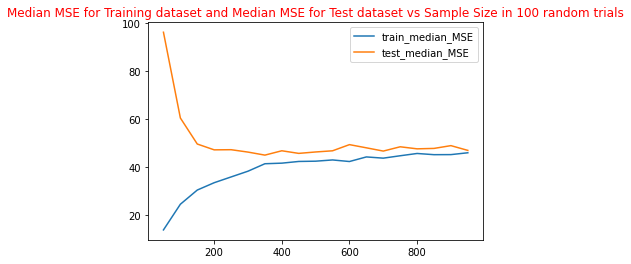

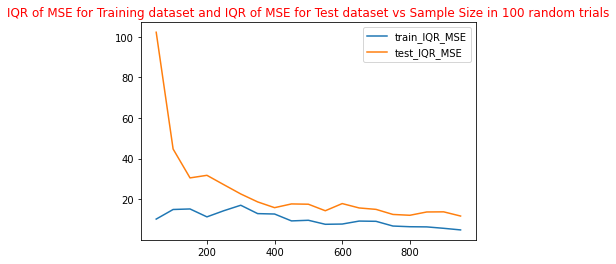

In [6]:
median_MSE2 = pd.DataFrame(columns = ['train_median_MSE', 'test_median_MSE'])
IQR_MSE2 = pd.DataFrame(columns = ['train_IQR_MSE', 'test_IQR_MSE'])

sample_size=list(range(50,951,50))
for s in sample_size:
    train_error=[]
    test_error=[]
    for i in range(99):
        sample=data_final.sample(n=s, random_state=i)
        train_data, test_data=train_test_split(sample,test_size=0.3,random_state=i)
        train_x=train_data.iloc[:,0:22]
        train_y=train_data[['y']]
        test_x=test_data.iloc[:,0:22]
        test_y=test_data[['y']]
        model2=LinearRegression()
        model2.fit(train_x, train_y)
        train_error.append(metrics.mean_squared_error(train_y,model2.predict(train_x)))
        test_error.append(metrics.mean_squared_error(test_y,model2.predict(test_x)))
    
    median_MSE2.loc[s] = (median(train_error),median(test_error))
    IQR_MSE2.loc[s] = (iqr(train_error),iqr(test_error))

print(median_MSE2)
print(IQR_MSE2)

median_MSE2.plot()
plt.title('Median MSE for Training dataset and Median MSE for Test dataset vs Sample Size in 100 random trials', c='r')
IQR_MSE2.plot()
plt.title('IQR of MSE for Training dataset and IQR of MSE for Test dataset vs Sample Size in 100 random trials', c='r')

- Are the performances on the train and test sets similar for different sample sizes? If not, why are the performances on the train set better/worse than the performance on the test set? You can answer these questions for small and large sample sizes separately. 

In this question, we increase the sample size iteratively. From the graphs, we observe that the perfomances of the training and test datasets are different for small sample sizes. However, they become similar as we increase the sample size. 

We observe that the median of training MSE values range from 13.73 to 45.99 for sample sizes 50 and 950 respectively. For test datasets, median values range from 96.21 to 46.91 for sample sizes 50 and 950 respectively. 

When we have a small dataset, we also have a small training dataset and test dataset. With a small training set, our model has a small number of observations for the approximation function to be fitted. Hence, we may have a small MSE value. As we introduce more observations to the training set by increasing the sample size, it has more observations to fit for function approximation. Hence, training MSE values increase. 

From the test dataset point of view, we probably generate a poor model with small number of training set and hence we observe a large MSE value for test dataset. In addition, when we have a small test dataset, the performance estimate of the test dataset may not be reliable enough. As sample size increases, the representativeness of our model increases since we have more observations in our training dataset. When we apply this improved model to test data, we observe a decrease in MSE values for the test dataset. 

When the sample size is less than approximately 400, we have overfitting problem, the error in test dataset is much larger than the error in training dataset. We observe than we can solve this problem by increasing the sample size. 

In terms of IQR, since we have more data for both training and test datasets as the sample size increases, dispersion becomes smaller for both of them. 

- If there were more examples in the dataset, would the performance improve? 

If we had more examples in the dataset, the training MSE values would be probably higher. Since we would have new observations, our model would try to represent these values as well and training error would increase. However, the performance of our model would be improved because it processes more observations for function approximation. Hence, we would observe a decrease in the test MSE values. 

- Could regularization improve the performance on the test set for small samples and/or large samples? Briefly explain your reasoning.      

Regularization deals with the problem of overfitting that is the model may not generalize beyond the training dataset. For small samples, we observe that the median of test MSE is much larger than the median of training MSE. It indicates that the model is overfitting to the training data. Hence, regularization can improve the performance on the test set for small samples. For large samples, the gap between the median of test MSE and training MSE values are very small. So, regularization may not improve the performance on the test set considerably.  

## Q3 - Polynomial Expansion d=2 (25 pts)

Answer the same questions in part Q2 (above) after applying polynomial expansion with degree=2 on the given dataset.    
**(Note: do not include bias i.e., set parameter include_bias=False)**  

     train_median_MSE  test_median_MSE
50       7.962537e-27        11.389801
100      1.256696e-26         9.228651
150      1.302663e-26        13.207191
200      1.236054e-25        17.671681
250      1.623033e-24        42.373748
300      4.389984e-02        79.532196
350      1.732461e-01        10.939926
400      2.690507e-01         6.077129
450      3.441260e-01         4.321577
500      4.037718e-01         3.371256
550      4.537349e-01         2.828042
600      4.926874e-01         2.457449
650      5.349071e-01         2.152433
700      5.727221e-01         1.913104
750      5.972338e-01         1.820225
800      6.224054e-01         1.754437
850      6.423387e-01         1.647119
900      6.588610e-01         1.583977
950      6.774524e-01         1.542366
     train_IQR_MSE  test_IQR_MSE
50    1.941878e-26      8.568569
100   1.238809e-26      6.247709
150   1.429698e-26      7.511978
200   1.121268e-25     10.180681
250   2.171941e-24     33.235148
300   3.976863e-02    

Text(0.5, 1.0, 'IQR of MSE for Training dataset and IQR of MSE for Test dataset vs Sample Size with Polynomial Expansion d=2 in 100 random trials')

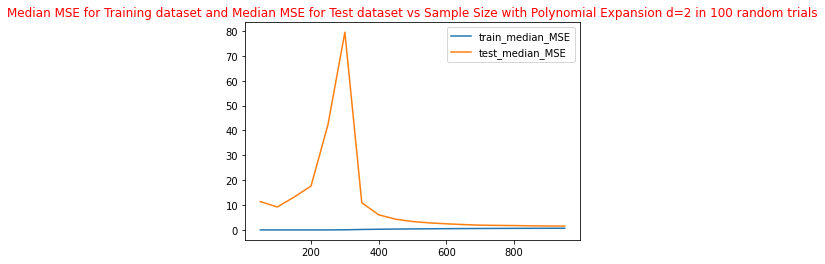

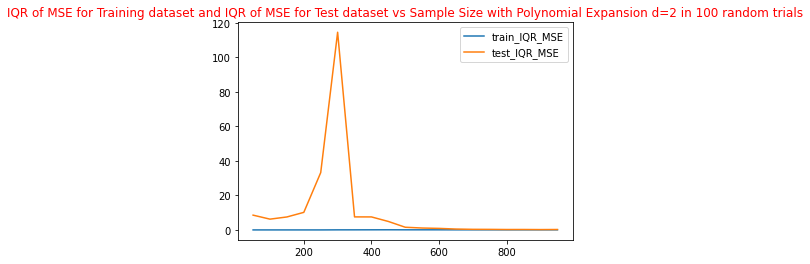

In [7]:
median_MSE3 = pd.DataFrame(columns = ['train_median_MSE', 'test_median_MSE'])
IQR_MSE3 = pd.DataFrame(columns = ['train_IQR_MSE', 'test_IQR_MSE'])

poly = PolynomialFeatures(2, include_bias = False) # Generating polynomial and interaction features

sample_size=list(range(50,951,50))
for s in sample_size:
    train_error_poly=[]
    test_error_poly=[]
    for i in range(99):
        sample=data_final.sample(n=s, random_state=i)
        poly_features = poly.fit_transform(sample.iloc[:,0:22])
        data_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())
        train_data, test_data=train_test_split(sample,test_size=0.3,random_state=i)
        train_x=train_data.iloc[:,0:22]
        train_y=train_data[['y']]
        test_x=test_data.iloc[:,0:22]
        test_y=test_data[['y']]
        
        poly_train_features = poly.fit_transform(train_x)
        train_x_with_poly=pd.DataFrame(poly_train_features, columns=poly.get_feature_names_out())
        poly_test_features=poly.fit_transform(test_x)
        test_x_with_poly=pd.DataFrame(poly_test_features, columns=poly.get_feature_names_out())
        model3=LinearRegression()
        model3.fit(train_x_with_poly, train_y)
        train_error_poly.append(metrics.mean_squared_error(train_y,model3.predict(train_x_with_poly)))
        test_error_poly.append(metrics.mean_squared_error(test_y,model3.predict(test_x_with_poly)))
    
    median_MSE3.loc[s] = (median(train_error_poly),median(test_error_poly))
    IQR_MSE3.loc[s] = (iqr(train_error_poly),iqr(test_error_poly))

print(median_MSE3)
print(IQR_MSE3)

median_MSE3.plot()
plt.title('Median MSE for Training dataset and Median MSE for Test dataset vs Sample Size with Polynomial Expansion d=2 in 100 random trials', c='r')
IQR_MSE3.plot()
plt.title('IQR of MSE for Training dataset and IQR of MSE for Test dataset vs Sample Size with Polynomial Expansion d=2 in 100 random trials', c='r')

- Are the performances on the train and test sets similar for different sample sizes? If not, why are the performances on the train set better/worse than the performance on the test set? You can answer these questions for small and large sample sizes separately. 

In this question, we increase the sample size iteratively similarly but we apply a polynomial expansion with d =2. 

When we compare the median of MSE values for training and test datasets with the linear regression model that we applied in Q2, we observe that the values decrease considerably. The minimum value for the median of test MSE was 44.94 in Q2 for sample size 350, now it is 10.94 for the same sample size and continue to fall as sample size increases.

The same situation is also observed for IQR values. 

When sample size is 300, probably we came up with a tuple in test dataset which is different than the ones in the training set so that we observe a peak. 

It seems that we can represent our data with a polynomial expansion in a better way than linear regression. 

- If there were more examples in the dataset, would the performance improve? 

For any model that we generate, having more examples would improve the performance if these additional examples are representative enough for the population. The training MSE values would be probably higher. Since we would have new observations, our model would try to represent these values as well and training error would increase. However, the performance of our model would be improved because it processes more observations. Hence, we would observe a decrease in the test MSE values. 

- Could regularization improve the performance on the test set for small samples and/or large samples? Briefly explain your reasoning.      

The regularization deals with the problem of overfitting that is the model may not generalize beyond the training dataset. From the graph, we observe that the median of test MSE is larger than the median of training MSE when sample size is less than 500. Regularization may improve the performance for test dataset in this range. 

## Q4 - Train (25 pts)

Take the first 100 rows of the given dataset as the input dataset. Then, use the LASSO regularization to fit the best possible model to the input dataset (perhaps, applying polynomial expansion with a suitable degree). When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. 

Report the model performance on the train/validation/test sets. 

What is the regression equation for the best model that you found? (You can simply consider magnitudes of the coefficients and include only the features that significantly contribute to the target variable)

In [8]:
sample_Q4 = data_final.iloc[:100]
train_valid_data_lasso, test_data_lasso = train_test_split(sample_Q4,test_size=0.2,random_state=40) # 20% for test
train_data_lasso, valid_data_lasso = train_test_split(train_valid_data_lasso,test_size=0.25,random_state=40) # 20% for validation and 60% for train
#print('test_data_lasso:', test_data_lasso.shape, 'train_data_lasso:', train_data_lasso.shape, 'valid_data_lasso:', valid_data_lasso.shape)
x_train_lasso = train_data_lasso.iloc[:,0:22]
y_train_lasso = train_data_lasso[['y']]
x_valid_lasso = valid_data_lasso.iloc[:,0:22]
y_valid_lasso = valid_data_lasso[['y']]
x_test_lasso = test_data_lasso.iloc[:,0:22]
y_test_lasso = test_data_lasso[['y']]

parameter=np.arange(0.001,1.1,0.01).tolist()
lasso_results=[]
MSE_all=[]

for alpha in parameter:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(x_train_lasso, y_train_lasso)
    train_r2 = lasso.score(x_train_lasso, y_train_lasso)
    valid_r2 = lasso.score(x_valid_lasso, y_valid_lasso)
    coeff_used = np.sum(lasso.coef_!=0)
    MSE = metrics.mean_squared_error(y_valid_lasso,lasso.predict(x_valid_lasso))
    MSE_all.append(MSE)
    #print('For alpha=',alpha,':Train R2:',train_r2,'Validation R2:',valid_r2,'\n# of coeff. used:',coeff_used,'MSE:',MSE,'intercept:',lasso.intercept_,'coeff.:',lasso.coef_ )


In [9]:
print('The minimum MSE:', min(MSE_all))

The minimum MSE: 75.5582345594203


- Take the first 100 rows of the given dataset as the input dataset. Then, use the LASSO regularization to fit the best possible model to the input dataset (perhaps, applying polynomial expansion with a suitable degree). When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits. Report the model performance on the train/validation/test sets. 

The LASSO regularization is applied with the first 100 rows of the dataset. We use an %60 train - %20 validation - %20 test split. Several models are constructed with different alpha parameters. In addition, R2 and MSE values are obtained. The MSE has tha smallest value of 75.56 when alpha is 0.011. With this alpha value, the train R2 equals to 0.9905 where the validation R2 equals to 0.9692.

- What is the regression equation for the best model that you found? (You can simply consider magnitudes of the coefficients and include only the features that significantly contribute to the target variable)

The regression equation is: y = -90.8767 + 5.0109*X1 + 8.1542*X2 + 0.1382*X3 - 0.8413*X4 - 0.1345*X5 + 0.4996*X6 - 0.3999*X7 + 1.8500*X8 - 0.6379*X9 - 1.1846*X10 - 0.1190*X11 - 3.3929*X12 - 4.0294*X13 + 2.6085*X14 - 4.8030*X15 - 4.1251*X17 + 2.6613*X19 + 1.5157*X20 + 3.8516*X21 + 2.9409*X22

In this equation we have 1 intercept and 20 predictors with nonzero coefficients. 


In [10]:
#lasso regularization using predictors and polynomial expansion
poly2 = PolynomialFeatures(2, include_bias=False) # Generating polynomial and interaction features

train_pred = train_data_lasso.iloc[:,0:22]
valid_pred = valid_data_lasso.iloc[:,0:22]
test_pred = test_data_lasso.iloc[:,0:22]

train_target = train_data_lasso[['y']]
valid_target = valid_data_lasso[['y']]
test_target = test_data_lasso[['y']]

poly_train_pred = poly2.fit_transform(train_pred)
poly_train_pred_df = pd.DataFrame(poly_train_pred, columns=poly2.get_feature_names_out())

poly_valid_pred = poly2.fit_transform(valid_pred)
poly_valid_pred_df = pd.DataFrame(poly_valid_pred, columns=poly2.get_feature_names_out())

poly_test_pred = poly2.fit_transform(test_pred)
poly_test_pred_df = pd.DataFrame(poly_test_pred, columns=poly2.get_feature_names_out())

result_lasso_poly=[]
coeff=[]
for alpha in parameter:
    lasso_poly = Lasso(alpha=alpha, max_iter=100000)
    lasso_poly.fit(poly_train_pred_df, train_target)
    valid_r2_poly = lasso_poly.score(poly_valid_pred_df, valid_target)
    coeff_used = np.sum(lasso_poly.coef_!=0)
    mse = metrics.mean_squared_error(valid_target,lasso_poly.predict(poly_valid_pred_df))
    result_lasso_poly.append([mse, valid_r2_poly, coeff_used])
    coeff.append(lasso_poly.coef_)
    print('For alpha=',alpha,'validation R-squared:', valid_r2_poly, 'number of coeff. used:', coeff_used, 'mse:',mse)
    print('For alpha=',alpha,'intercept:', lasso_poly.intercept_,'coefficients:',lasso_poly.coef_)
result_lasso_poly_df=pd.DataFrame(result_lasso_poly, index=parameter)
result_lasso_poly_df.columns=['mse', 'validation R2','number of predictors']
print(result_lasso_poly_df)
coeff_df=pd.DataFrame(coeff, index=parameter)
coeff_df.columns=poly_valid_pred_df.columns

#obtaining the non-zero coefficients of the best model
signif_model=coeff_df.iloc[109,:]
signif_model_df=pd.DataFrame(signif_model)
signif_model_df.columns=['parameter']

signif_model_df= signif_model_df.drop(signif_model_df[signif_model_df.parameter == 0].index)
signif_model_df



For alpha= 0.001 validation R-squared: 0.9739438449279884 number of coeff. used: 148 mse: 63.9436077939352
For alpha= 0.001 intercept: [-98.36010157] coefficients: [ 4.99247183e+00  7.81587514e+00  8.29099568e-01  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.82313366e+00  1.54317611e+00
 -1.03947870e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -7.05283740e-03 -1.80032342e-03
  1.81423592e-02 -4.27607440e-02 -2.07312328e-02  7.98917835e-02
 -3.48350015e-02  3.39666504e-02 -1.77098184e-02  2.44683316e-01
  1.31009771e-01 -3.50609193e-03  1.31292801e-01 -0.00000000e+00
 -2.01901476e-02  0.00000000e+00 -1.23172371e-01 -5.13473732e-01
 -1.68629142e-01  1.37502035e-01  2.28301501e-01  3.36279814e-01
  4.07333800e-02 -3.65628072e-02 -2.16259270e-02 -2.89941679e-02
 -2.05376803e-02  3.35525221e-02  1.89428009e-02  2.6253

,parameter
n1^2,0.013737
n1 n2,0.022941
n1 n3,0.041742
n1 n4,0.036639
n1 n5,0.045453
n1 n6,0.050277
n1 u2,0.105951
n1 u3,0.001470
n2^2,0.192712
n2 n5,-0.007751


When we applied LASSO with polynomial expansion, we observe that the minimum MSE is 1.78 which was 75.56 before. In the minimum MSE case, alpha is 1.091, R2 is 0.999274  and the model is predicted with 30 predictors. 

Both MSE and R2 are improved with polynomial expansion. 

The regression equation is: y = 38.1642 + 0.013737*(X1)^2 + 0.022941*(X1)(X2) + 0.041742*(X1)(X3) + ... + 0.016559*(X9)(X19)

GENERAL COMMENTS: 

Q2. The values seem to be saturating >> after a point increasing the sample size would not improve the performance //it is expected to apply regularization and then comment >> 4 points 
Q3. It is needed to apply polynomial features just for numeric attributes and then concatenate one hot encoded attributes. Instead, poly features are applied both on numeric and  encoded attributes; therefore huge mse values are recorded// it is expected to apply regularization and then comment >>  8 points  